## Figure 3 - convert asc/desc LOS into vertial / horizontal displacement

Firt, run [prep_GBIS](./prep_GBIS.ipynb) after smallbaselineApp.py to prepare data.

In [2]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import mintpy
from mintpy.defaults.plot import *
from mintpy.utils import readfile
from mintpy import view, asc_desc2horz_vert

## Common setting
work_dir = os.path.expanduser('~/Documents/Paper/2019_Kirishima/figs_src/Shinmoe_data')
os.chdir(work_dir)
print('Go to directory', work_dir)

# input files
in_dirs = ['~/insarlab/Kirishima/ShinmoeAlosDT73/mintpy',
           '~/insarlab/Kirishima/ShinmoeAlosAT424/mintpy']
in_dirs = [os.path.expanduser(i) for i in in_dirs]
unw_files = []
for in_dir in in_dirs:
    atr = readfile.read_attribute(os.path.join(in_dir, 'velocity.h5'))
    unw_file = os.path.join(in_dir, '{}.unw'.format(atr['DATE12']))
    unw_files.append(unw_file)

Go to directory /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/Shinmoe_data


### Run asc_desc2horz_vert.py

In [4]:
## Generate decomposed file
out_dir = os.path.expanduser('~/insarlab/Kirishima/Model/data')
out_files = [os.path.join(out_dir, i) for i in ['ShinmoeHz.h5', 'ShinmoeUp.h5']]
scp_args = '{f1} {f2} -o {o1} {o2}'.format(f1=unw_files[0], f2=unw_files[1], o1=out_files[0], o2=out_files[1])
print('asc_desc2horz_vert.py', scp_args)
#asc_desc2horz_vert.main(scp_args.split())

asc_desc2horz_vert.py /Users/yunjunz/insarlab/Kirishima/ShinmoeAlosDT73/mintpy/20081012_20100302.unw /Users/yunjunz/insarlab/Kirishima/ShinmoeAlosAT424/mintpy/20080929_20100520.unw -o /Users/yunjunz/insarlab/Kirishima/Model/data/ShinmoeHz.h5 /Users/yunjunz/insarlab/Kirishima/Model/data/ShinmoeUp.h5


### Plot figure for horizontal and vertical displacement

save figure to file /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/Shinmoe_data/dis_horz_vert.png


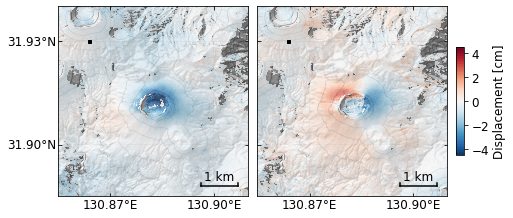

In [15]:
# view.py options
dem_file  = os.path.expanduser('~/insarlab/Kirishima/DEM/Shinmoe10m.dem.wgs84')
opt = ' --sub-lon 130.855 130.91 --sub-lat 31.885 31.94 '
opt += '--dem {} --contour-step 100 --contour-smooth 0.0 '.format(dem_file)
opt += ' -c RdBu_r -v -4.5 4.5 -u cm '
opt += ' --notitle --fontsize 12 --ref-size 3 --lalo-step 0.03 --nocbar '
opt += ' --scalebar 0.2 0.85 0.05 --scalebar-pad 0.05 --alpha 0.7 '
#opt += ' --ref-yx {} {} '.format(atr['REF_Y'], atr['REF_X']) #use the same reference point as displacement time-seris
opt += ' --noverbose '

## plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[6, 3])

# vertical
cmd = 'view.py {f} --lalo-loc 1 0 0 1 {o}'.format(f=out_files[1], o=opt)
dataUp, atr, inps = view.prep_slice(cmd)
axs[0], inps, im, cbar = view.plot_slice(axs[0], dataUp, atr, inps)

# horizontal
cmd = 'view.py {f} --lalo-loc 0 0 0 1 {o} '.format(f=out_files[0], o=opt)
dataHz, atr, inps = view.prep_slice(cmd)
axs[1], inps, im, cbar = view.plot_slice(axs[1], dataHz, atr, inps)

fig.subplots_adjust(wspace=0.05, left=0.05, right=0.95, top=0.95, bottom=0.05)

# colorbar
cax = fig.add_axes([0.97, 0.25, 0.02, 0.5])
cbar = plt.colorbar(im, cax=cax, orientation='vertical', ticks=[-4, -2, 0, 2, 4])
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Displacement [cm]', fontsize=font_size)

# output
out_file = os.path.abspath('dis_horz_vert.png')
print('save figure to file', out_file)
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()

### Source geometry based on the ratio of max horz / vert displacement

In [16]:
max_west_dis = -np.nanmin(dataHz)
max_east_dis = np.nanmax(dataHz)
max_vert_dis = np.nanmax(np.abs(dataUp))
print('max vert displacement: {:.2f} cm'.format(max_vert_dis))
print('max east displacement: {:.2f} cm; horz/vert ratio: {:.2f}'.format(max_east_dis, max_east_dis/max_vert_dis))
print('max west displacement: {:.2f} cm; horz/vert ratio: {:.2f}'.format(max_west_dis, max_west_dis/max_vert_dis))

max vert displacement: 6.50 cm
max east displacement: 3.25 cm; horz/vert ratio: 0.50
max west displacement: 4.65 cm; horz/vert ratio: 0.72


Typical ratio of max horz/vert displacement (Fig. 4 and 6 in Fialko et al., 2001):
+ Sills: < 0.3
+ Spherical sources: ~0.4

Thus, we model this displacement as **Prolate Spheroid** (Yang, 1988) or **Compound Dislocation Models** (Nikkhoo, 2016).